- Predictions which are actually true >>> True Positive
- Predictions which are actually false(actually the negative predicted class) >>> True Negative
- Predictions which are actually false but predicted true >>> False Positive
- Predictions which are actually true but predicted false(actually the negative predicted class) >>> False Negative

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,precision_score,recall_score,classification_report
## classification report will cover almost every metric

In [27]:
truth=['cat','not a cat','cat','cat','not a cat','cat','not a cat']
predictions=['cat','cat','not a cat','cat','cat','not a cat','cat']

## Precision
- Prediction as base line

In [39]:
prec = precision_score(truth, predictions, pos_label='cat')
print("Precision for 'cat':", prec)

Precision for 'cat': 0.4


## Recall
- Truth as baseline (whole predictions)

In [ ]:
                                TP
Recall(NEGATIVE) =  -------------------------
                TOTAL NO OF SAMPLES FOR RIGHT PREDICTION (LIKE DOG) 

In [37]:
rec=prec = recall_score(truth, predictions, pos_label='cat')
print("Recall:", rec)

Recall: 0.5


## F-1 Score

In [ ]:
# our data is kind of unbalanced (4-cat & 3-not a cat) so we will try f-1 score

In [40]:
f1= 2 * (prec + rec/prec * rec)

In [41]:
f1

2.05

In [43]:
f1=f1_score(truth,predictions,pos_label='cat')
f1

0.4444444444444445

In [44]:
f1=f1_score(truth,predictions,pos_label='not a cat')
f1

0.0

## Acuuracy

In [33]:
acc=accuracy_score(truth,predictions)
print('Accuracy',acc)

Accuracy 0.2857142857142857


## Confusion Matrix
- To understand confusion matrix we should first understand what are true positive,true negatives,false negatives,false positives

In [9]:

######this func is just simply used to display cm using heatmap
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('Truth')
    plt.xlabel('Prediction')

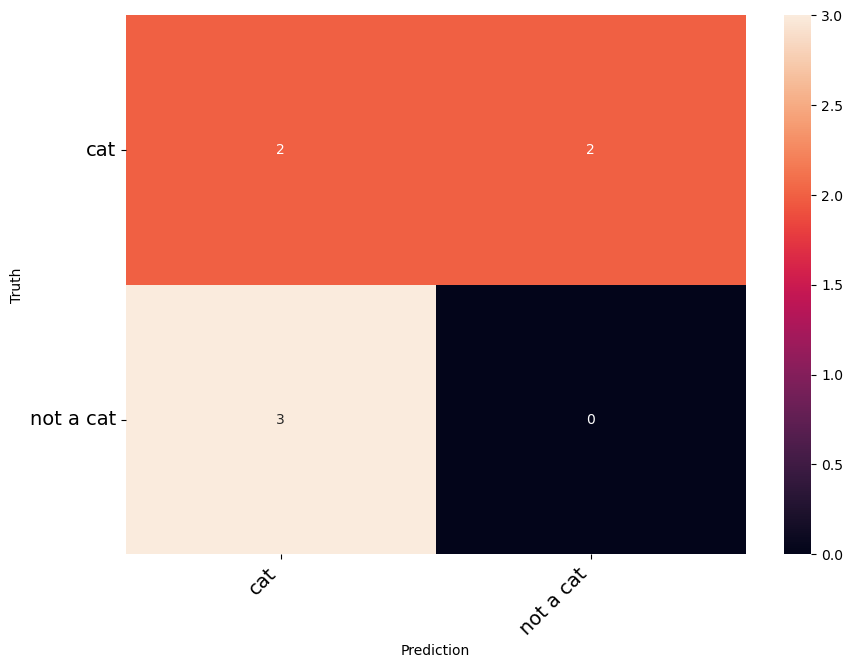

In [19]:
cm=confusion_matrix(truth,predictions)
print_confusion_matrix(cm,["cat","not a cat"])

In [21]:
print(classification_report(truth,predictions))

              precision    recall  f1-score   support

         cat       0.40      0.50      0.44         4
   not a cat       0.00      0.00      0.00         3

    accuracy                           0.29         7
   macro avg       0.20      0.25      0.22         7
weighted avg       0.23      0.29      0.25         7



## Sensitivity 
- True positive rate (TPR)
- same as recall

## Specifity
- True Negative Rate (TNR)
- TN/TN+FP

### ROC/AUC
- ROC (Receiver Operating Characteristic)
- AUC (Area Under the Curve)

In [46]:
from sklearn.metrics import roc_auc_score,roc_curve

- ROC curves and ROC AUC scores are typically used to evaluate the performance of binary classification models, not for manually created or hypothetical truth and predictions used for practice tasks. When you use these metrics, you should have actual model predictions and corresponding true labels from your dataset to assess how well your model is distinguishing between the classes. This way, you get meaningful insights into your model's performance in real-world scenarios.

In [56]:
from sklearn.preprocessing import LabelBinarizer

# Convert categorical labels to binary labels
lb = LabelBinarizer()
truth_binary = lb.fit_transform(truth)
predictions_binary = lb.transform(predictions)

# Compute ROC AUC score for the positive class (index 1 in binary labels)
roc_auc=roc_auc_score(truth_binary, predictions_binary, average='weighted')  # Use 'weighted' for multiclass
print("ROC AUC Score:", roc_auc)

ROC AUC Score: 0.25
